In [1]:
from rtmag.paper.load import load_input_label, MyModel

# Input & Label

In [2]:
input_files, label_files = load_input_label("/mnt/f/isee_dataset/11158")
len(input_files), len(label_files)

(66, 66)

In [3]:
idx = 13
input_files[idx]

PosixPath('/mnt/f/isee_dataset/11158/input/input_11158_20110214_000000.npz')

# Model prediction & Label (NLFFF, Potential)

In [4]:
from time import time

In [5]:
mm = MyModel("/home/mgjeon/space/workspace/base/pino_CC_Hnorm_Unit_2")
# mm = MyModel("/home/mgjeon/space/workspace/base/uno_pi_cc_hnorm_unit_aug")

In [6]:
start_time = time()
b = mm.get_pred(input_files[idx])
print(f"{time() - start_time} seconds")

Model loaded from epoch 64
1.0533947944641113 seconds


In [7]:
start_time = time()
B = mm.get_label(label_files[idx])
print(f"{time() - start_time} seconds")

1.5211129188537598 seconds


In [8]:
start_time = time()
Bp = mm.get_pot(label_files[idx])
print(f"{time() - start_time} seconds")

1.4670543670654297 seconds


In [9]:
start_time = time()
dx, dy, dz, dV = mm.get_dV(input_files[idx])
print(f"{time() - start_time} seconds")

0.0043599605560302734 seconds


# Qualitative Evaluation

In [12]:
import matplotlib.pyplot as plt
import numpy as np

AttributeError: QuadMesh.set() got an unexpected keyword argument 'origin'

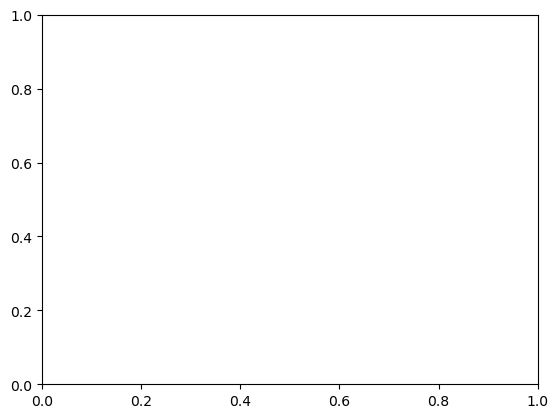

In [25]:
fig, ax = plt.subplots()
ax.pcolormesh(b[:, :, 5, 2].T, origin="lower", cmap="gray")

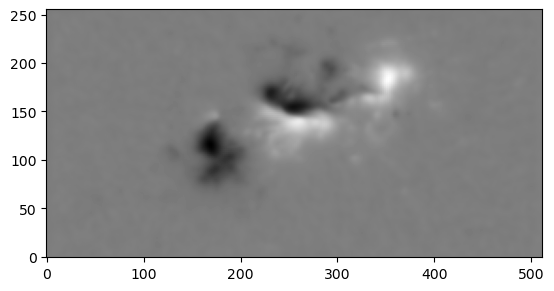

In [23]:
fig, ax = plt.subplots()
ax.imshow(B[:, :, 5, 2].T, origin="lower", cmap="gray")

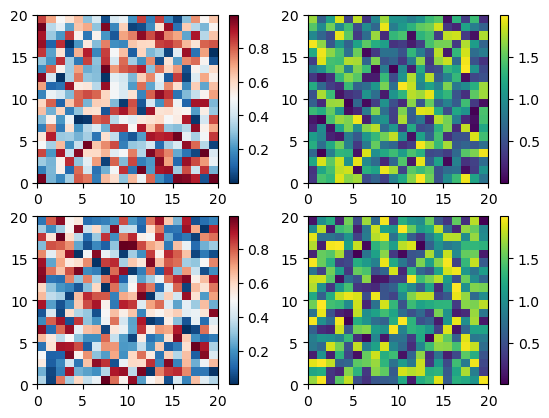

In [13]:
fig, axs = plt.subplots(3, 2)
for col in range(3):
    for row in range(2):
        ax = axs[row, col]
        pcm = ax.pcolormesh(np.random.random((20, 20)) * (col + 1),
                            cmap=cmaps[col])
        fig.colorbar(pcm, ax=ax)


In [10]:
from rtmag.paper.diff import curl
from rtmag.paper.metric import vector_norm, current_density


In [13]:
start_time = time()
j = current_density(b, dx, dy, dz)
j_map = vector_norm(j).sum(2)
print(f"{time() - start_time} seconds")

1.0008432865142822 seconds


In [14]:
start_time = time()
J = current_density(B, dx, dy, dz)
J_map = vector_norm(J).sum(2)
print(f"{time() - start_time} seconds")

0.5898056030273438 seconds


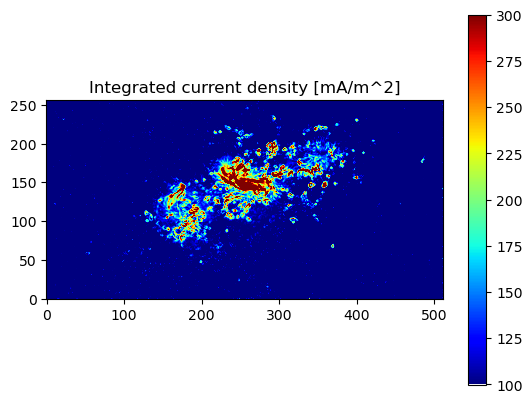

In [16]:
plt.imshow(j_map.T, origin='lower', cmap='jet', vmin=100, vmax=300)
plt.title("Integrated current density [mA/m^2]")
plt.colorbar()

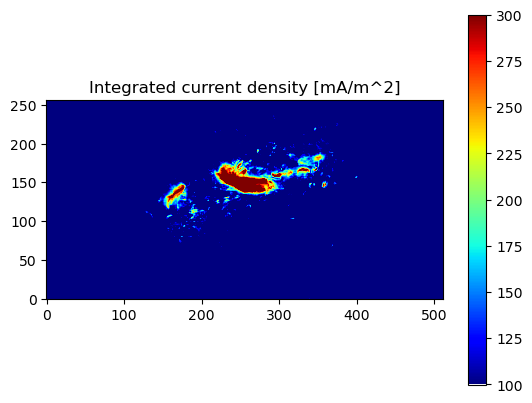

In [17]:
plt.imshow(J_map.T, origin='lower', cmap='jet', vmin=100, vmax=300)
plt.title("Integrated current density [mA/m^2]")
plt.colorbar()

In [ ]:
plot_z = [0, 5, 10, 50, 150, 250]
c = 0

# Generate some example data (you'll need your actual data here)
y_true = J_map
y_predicted = j_map
y_difference = np.abs(y_true - y_predicted)

# Create a 3x4 grid of subplots
fig, axs = plt.subplots(3, len(plot_z), figsize=(3*len(plot_z), 6))

# Plot the true data
for i in range(len(plot_z)):
    axs[0, i].imshow(y_true[:, :, plot_z[i]].T, origin='lower', cmap='gray', label="True", vmin=-2500/(plot_z[i]+1), vmax=2500/(plot_z[i]+1))
    axs[0, i].set_title(f"z = {plot_z[i]}")

# Plot the predicted data
for i in range(len(plot_z)):
    axs[1, i].imshow(y_predicted[:, :, plot_z[i]].T, origin='lower', cmap='gray', label="p-CNN = all", vmin=-2500/(plot_z[i]+1), vmax=2500/(plot_z[i]+1))
    axs[1, i].set_title(f"pred")

# Plot the absolute difference
for i in range(len(plot_z)):
    im = axs[2, i].imshow(y_difference[:, :, plot_z[i]].T, origin='lower', cmap='jet', label="Absolute Difference", vmin=-5, vmax=5)
    # axs[2, i].set_title(f"z = {i}")

# Add labels, legends, and adjust spacing
for ax in axs.flat:
    # ax.set(xlabel="X", ylabel="Y")
    ax.set_xticks([])
    ax.set_yticks([])

# Add colorbars
# for i, ax in enumerate(axs.flat):
#     # Create colorbar
#     cax = fig.add_axes([ax.get_position().x1+0.01, ax.get_position().y0, 0.005, ax.get_position().height])
#     fig.colorbar(im, cax=cax)
#     # Hide x and y axis ticks
#     ax.set_xticks([])
#     ax.set_yticks([])

plt.tight_layout()
# Adjust layout

# Show the plot
plt.show()


In [ ]:
plot_z = [0, 5, 10, 50, 150, 250]
c = 0

# Generate some example data (you'll need your actual data here)
y_true = B[..., c]
y_predicted = b[..., c]
y_difference = np.abs(y_true - y_predicted)

# Create a 3x4 grid of subplots
fig, axs = plt.subplots(3, len(plot_z), figsize=(3*len(plot_z), 6))

# Plot the true data
for i in range(len(plot_z)):
    axs[0, i].imshow(y_true[:, :, plot_z[i]].T, origin='lower', cmap='gray', label="True", vmin=-2500/(plot_z[i]+1), vmax=2500/(plot_z[i]+1))
    axs[0, i].set_title(f"z = {plot_z[i]}")

# Plot the predicted data
for i in range(len(plot_z)):
    axs[1, i].imshow(y_predicted[:, :, plot_z[i]].T, origin='lower', cmap='gray', label="p-CNN = all", vmin=-2500/(plot_z[i]+1), vmax=2500/(plot_z[i]+1))
    axs[1, i].set_title(f"pred")

# Plot the absolute difference
for i in range(len(plot_z)):
    im = axs[2, i].imshow(y_difference[:, :, plot_z[i]].T, origin='lower', cmap='jet', label="Absolute Difference", vmin=-5, vmax=5)
    # axs[2, i].set_title(f"z = {i}")

# Add labels, legends, and adjust spacing
for ax in axs.flat:
    # ax.set(xlabel="X", ylabel="Y")
    ax.set_xticks([])
    ax.set_yticks([])

# Add colorbars
# for i, ax in enumerate(axs.flat):
#     # Create colorbar
#     cax = fig.add_axes([ax.get_position().x1+0.01, ax.get_position().y0, 0.005, ax.get_position().height])
#     fig.colorbar(im, cax=cax)
#     # Hide x and y axis ticks
#     ax.set_xticks([])
#     ax.set_yticks([])

plt.tight_layout()
# Adjust layout

# Show the plot
plt.show()


In [ ]:
plot_z = [0, 5, 10, 50, 150, 250]
c = 1

# Generate some example data (you'll need your actual data here)
y_true = B[..., c]
y_predicted = b[..., c]
y_difference = np.abs(y_true - y_predicted)

# Create a 3x4 grid of subplots
fig, axs = plt.subplots(3, len(plot_z), figsize=(3*len(plot_z), 6))

# Plot the true data
for i in range(len(plot_z)):
    axs[0, i].imshow(y_true[:, :, plot_z[i]].T, origin='lower', cmap='gray', label="True", vmin=-2500/(plot_z[i]+1), vmax=2500/(plot_z[i]+1))
    axs[0, i].set_title(f"z = {plot_z[i]}")

# Plot the predicted data
for i in range(len(plot_z)):
    axs[1, i].imshow(y_predicted[:, :, plot_z[i]].T, origin='lower', cmap='gray', label="p-CNN = all", vmin=-2500/(plot_z[i]+1), vmax=2500/(plot_z[i]+1))
    axs[1, i].set_title(f"pred")

# Plot the absolute difference
for i in range(len(plot_z)):
    im = axs[2, i].imshow(y_difference[:, :, plot_z[i]].T, origin='lower', cmap='jet', label="Absolute Difference", vmin=-5, vmax=5)
    # axs[2, i].set_title(f"z = {i}")

# Add labels, legends, and adjust spacing
for ax in axs.flat:
    # ax.set(xlabel="X", ylabel="Y")
    ax.set_xticks([])
    ax.set_yticks([])

# Add colorbars
# for i, ax in enumerate(axs.flat):
#     # Create colorbar
#     cax = fig.add_axes([ax.get_position().x1+0.01, ax.get_position().y0, 0.005, ax.get_position().height])
#     fig.colorbar(im, cax=cax)
#     # Hide x and y axis ticks
#     ax.set_xticks([])
#     ax.set_yticks([])

plt.tight_layout()
# Adjust layout

# Show the plot
plt.show()


In [ ]:
plot_z = [0, 5, 10, 50, 150, 250]
c = 2

# Generate some example data (you'll need your actual data here)
y_true = B[..., c]
y_predicted = b[..., c]
y_difference = np.abs(y_true - y_predicted)

# Create a 3x4 grid of subplots
fig, axs = plt.subplots(3, len(plot_z), figsize=(3*len(plot_z), 6))

# Plot the true data
for i in range(len(plot_z)):
    axs[0, i].imshow(y_true[:, :, plot_z[i]].T, origin='lower', cmap='gray', label="True", vmin=-2500/(plot_z[i]+1), vmax=2500/(plot_z[i]+1))
    axs[0, i].set_title(f"z = {plot_z[i]}")

# Plot the predicted data
for i in range(len(plot_z)):
    axs[1, i].imshow(y_predicted[:, :, plot_z[i]].T, origin='lower', cmap='gray', label="p-CNN = all", vmin=-2500/(plot_z[i]+1), vmax=2500/(plot_z[i]+1))
    axs[1, i].set_title(f"pred")

# Plot the absolute difference
for i in range(len(plot_z)):
    im = axs[2, i].imshow(y_difference[:, :, plot_z[i]].T, origin='lower', cmap='jet', label="Absolute Difference", vmin=-5, vmax=5)
    # axs[2, i].set_title(f"z = {i}")

# Add labels, legends, and adjust spacing
for ax in axs.flat:
    # ax.set(xlabel="X", ylabel="Y")
    ax.set_xticks([])
    ax.set_yticks([])

# Add colorbars
# for i, ax in enumerate(axs.flat):
#     # Create colorbar
#     cax = fig.add_axes([ax.get_position().x1+0.01, ax.get_position().y0, 0.005, ax.get_position().height])
#     fig.colorbar(im, cax=cax)
#     # Hide x and y axis ticks
#     ax.set_xticks([])
#     ax.set_yticks([])

plt.tight_layout()
# Adjust layout

# Show the plot
plt.show()


In [ ]:
plt.plot(B[:, 128, 10, 2], label='ISEE')
plt.plot(b[:, 128, 10, 2], label='pred')
plt.legend()
plt.xlabel("X")
plt.show()

In [ ]:
plt.plot(B[256, :, 10, 2], label='ISEE')
plt.plot(b[256, :, 10, 2], label='pred')
plt.legend()
plt.xlabel("Y")
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torchmetrics import MeanSquaredError, ConcordanceCorrCoef

In [ ]:
z_values = np.arange(b.shape[2])
mse_metrics = []
ccc_metrics = []

for z in z_values:
    mse_metrics.append( MeanSquaredError()(torch.tensor(b[:, :, z, :]).flatten(), torch.tensor(B[:, :, z, :]).flatten()).item())
    ccc_metrics.append( ConcordanceCorrCoef()(torch.tensor(b[:, :, z, :]).flatten(), torch.tensor(B[:, :, z, :]).flatten()).item() )

In [ ]:
plt.plot(z_values, mse_metrics)
plt.show()

plt.plot(z_values, ccc_metrics)
plt.show()

In [ ]:
plt.plot(B[:, 128, 100, 0], label='ISEE')
plt.plot(b[:, 128, 100, 0], label='PINO')
plt.legend()
plt.xlabel("X")
plt.show()

In [ ]:
from scipy.signal import savgol_filter

In [ ]:
# plt.plot(z_values, ccc_metrics)
plt.plot(z_values, savgol_filter(ccc_metrics, 4, 2))
plt.show()

In [ ]:
z = 250
n = 1

print(f"z={z}")

fig, ax = plt.subplots()
ax.scatter(b[::n, ::n, z, 0].flatten(), B[::n, ::n, z, 0].flatten(), s=1)
low_x, high_x = ax.get_xlim()
low_y, high_y = ax.get_ylim()
low = min(low_x, low_y)
high = max(high_x, high_y)
ax.plot([low, high], [low, high], ls="--", c="red", alpha=1)
ax.set_xlabel('bx')
ax.set_ylabel('Bx')
ax.set_xlim([low, high])
ax.set_ylim([low, high])
ax.set_aspect('equal')
plt.show()

fig, ax = plt.subplots()
ax.scatter(b[::n, ::n, z, 1].flatten(), B[::n, ::n, z, 1].flatten(), s=1)
low_x, high_x = ax.get_xlim()
low_y, high_y = ax.get_ylim()
low = min(low_x, low_y)
high = max(high_x, high_y)
ax.plot([low, high], [low, high], ls="--", c="red", alpha=1)
ax.set_xlabel('by')
ax.set_ylabel('By')
ax.set_xlim([low, high])
ax.set_ylim([low, high])
ax.set_aspect('equal')
plt.show()

fig, ax = plt.subplots()
ax.scatter(b[::n, ::n, z, 2].flatten(), B[::n, ::n, z, 2].flatten(), s=1)
low_x, high_x = ax.get_xlim()
low_y, high_y = ax.get_ylim()
low = min(low_x, low_y)
high = max(high_x, high_y)
ax.plot([low, high], [low, high], ls="--", c="red", alpha=1)
ax.set_xlabel('bz')
ax.set_ylabel('Bz')
ax.set_xlim([low, high])
ax.set_ylim([low, high])
ax.set_aspect('equal')
plt.show()